<a href="https://colab.research.google.com/github/shivanginayak-bit/shivanginayak-bit/blob/main/Copy_of_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Introduction: What is Naive Bayes Classifier? </u></b>

### Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.


### Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as P(L | features). Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

### $P(L ~|~ \rm features)=\frac{P(\rm features ~|~ L) P(L)}{P(\rm features)}$

### If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

# $\frac{P(L_1 ~|~ \rm features)}{P(L_2 ~|~ \rm features) }= \frac{P(\rm features ~|~ L_1)}{P(\rm features ~|~ L_2)}\frac{P(L_1)}{P(L_2)}$

P(L1|X)/P(L2|X) > 1 ? P(L1|X) > P(L2|X), You will assign the L1 label in the Prediction
P(L1|x)/P(L2|x) < 1 ? P(L1|X) < P(L2|X), You will assign the L2 label in the Prediction

### All we need now is some model by which we can compute $P(\rm features~|~ L)$ for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

### The posterior probability can be written as :

# $P(Y ~|~X) = P(y)P(x_1|y)P(x_2|y,x_1)....P(x_n|y,x_1,...,x_{n-1})$

### Assuming all the X are conditionally independent
# $P(Y=1|X) = \frac{P(y=1)P(x_1|y=1)....P(x_n|y=1)}{P(X)}$

# $P(Y=0|X) = \frac{P(y=0)P(x_1|y=0)....P(x_n|y=0)}{P(X)}$


# $\frac{P(Y=0|X)}{$P(Y=1|X)} = \frac{P(y=0)P(x_1|y=0)....P(x_n|y=0)}{P(y=1)P(x_1|y=1)....P(x_n|y=1)}$

### This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.


  X1 X2 X3 X4 X5 X6 Y
1  9                 1
2  9                1
3  8                0
4  8                0
5  8                1
6  9                0
7  9                1
8  9                1

P  9                ?

P(Y=1) = 5/8
P(Y=0) = 3/8
P(X1 = 9 |Y=1) = 4/5
P(X1 = 8 |Y=1) = 1/5
P(X1 = 9 |Y=0) = 1/3
P(X1 = 8 |Y=0) = 2/3

P(Y=1|X1=9)/P(Y=0 | X1=9) = P(X1=9 | Y =1 ) * P(Y=1) / P(X1=9 | Y =0 ) * P(Y=0)


P(1)/P(2) & P(1)/P(3) & P(2)/P(3)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:

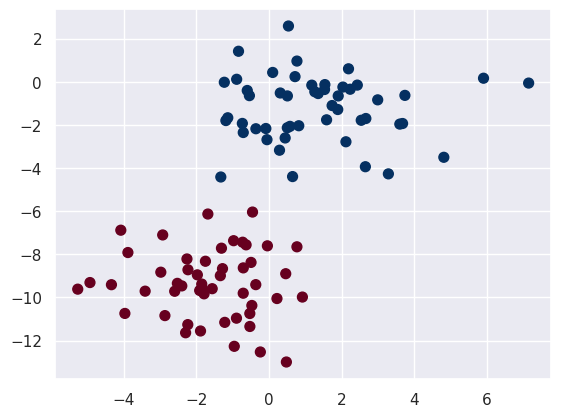

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure:

[(-8.0, 8.0), (-15.0, 5.0)]

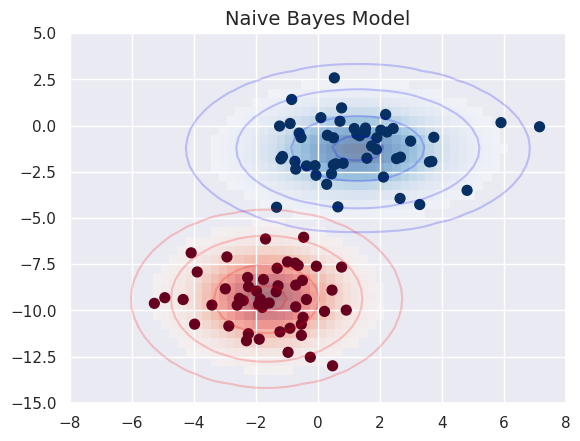

In [ ]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)

## The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

# <b><u> Generative vs Discriminative Model </u></b>



## Suppose we are solving a classification problem to decide if an email is spam or not based on the words in the email. We have a joint model over labels Y=y, and features $X={x_1, x_2, …x_n}$. The joint distribution of the model can be represented as $p(Y , X) = P(y, x_1,x_2…x_n)$. Our goal is to estimate the probability of spam email: $P(Y=1~|~X)$. Both generative and discriminative models can solve this problem, but in different ways.

## Let’s see why and how they are different!

## To get the conditional probability $P(Y~|~X)$, generative models estimate the prior P(Y) and likelihood $P(X~|~Y)$ from training data and use Bayes rule to calculate the posterior $P(Y ~|~X)$:

## <b> $P(Y~|~X) = \frac{P(X ~|~Y) P(Y)}{P(X)}$

## <b> $\rm posterior = \frac{\rm prior ~*~ \rm likelihood}{evidence}$ </b>

## On the other hand, discriminative models directly assume functional form for $P(Y~|~X)$ and estimate parameters of $P(Y~|~X)$ directly from training data.

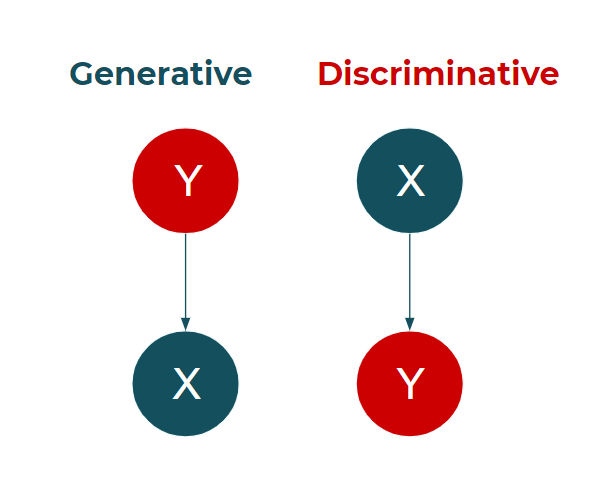

## The graph above shows the difference in the structures of generative and discriminative models. The circles represent variable(s) and the direction of the lines indicates what probabilities we can infer. In our spam classification problem, we are given $X$: the words in the emails, and Y is unknown. We see that the arrow in the discriminative model graph(right) is pointing from X to Y, indicating that we can infer $P(Y~~X)$ directly from the given $X$. However, the arrow in the generative model graph(left) is pointing towards the opposite direction, which means we need to infer the values of $P(Y)$ and $P(X~|~Y)$ from the data first and use them to calculate $P(Y~|~X)$.

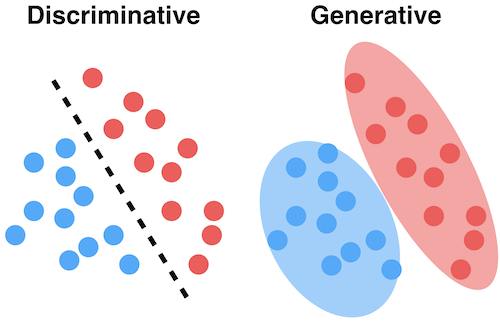

# <b><u> Generative Models </u></b>
## Generative models are models where the focus is the distribution of individual classes in a dataset and the learning algorithms tend to model the underlying patterns/distribution of the data points. These models use the intuition of joint probability in theory, creating instances where a given feature (x)/input and the desired output/label (y) exist at the same time.

## Generative models use probability estimates and likelihood to model data points and distinguish between different class labels in a dataset. These models are capable of generating new data instances. However, they also have a major drawback. The presence of outliers affects these models to a significant extent.

## Examples of generative models :
* ### Naive Bayes Classifier
* ### Hidden Markov Model
* ### Linear Discriminant Analysis

# <b><u> Discriminative Models </u></b>

## Discriminative models, also called conditional models, tend to learn the boundary between classes/labels in a dataset. Unlike generative models, the goal here is to find the decision boundary separating one class from another.So while a generative model will tend to model the joint probability of data points and is capable of creating new instances using probability estimates and maximum likelihood, discriminative models (just as in the literal meaning) separate classes by rather modeling the conditional probability and do not make any assumptions about the data point. They are also not capable of generating new data instances.Discriminative models have the advantage of being more robust to outliers, unlike the generative models.

## Examples of discriminative models :
* ### Logistic Regression
* ### Support Vector Machine
* ### Decision Trees

# <b><u> Comparison between the two class of models </u></b>

## <b> Accuracy </b>
* ### Generative models are less accurate than discriminative models when the assumption of conditional independence is not satisfied. For example, in our spam classification problem, let $x_1$ = number of times “bank” appear in the email data, and $x_2$ = number of times “account” appear in the email. Regardless of whether spam, these two words always appear together, i.e. $x_1 = x_2$. Learning in naive Bayes results in $p(x_1 ~|~ y) = p(x_2 ~|~ y)$, which double counts the evidence. Logistic regression doesn’t have this problem because it can set either $α_1=0$ or $α_2=0$.


## <b> Missing Data </b>
* ### Generative models can work with missing data, and discriminative models generally can’t. In generative models, we can still estimate the posterior by marginalizing over the unseen variables. However, discriminative models usually require all the features X to be observed.


## <b> Performance </b>
* ### Compared with discriminative models, generative models need less data to train. This is because generative models are more biased as they make stronger assumptions (assumption of conditional independence).


## <b> Application </b>
* ### Discriminative models are “discriminative” because they are useful but only useful for discriminating Y’s label, so they can only solve classification problems. Generative models have more applications besides classification, e.g. samplings, bayes learning, MAP inference.

# <b><u> Python Implementation of Naive Bayes algorithm </u></b>

## <b> Our objective is to predict whether a message will be spam or not</b>

### Since we have textual data, we will familiarize ourselves with basic Natural Language Processing technqiues so that we can create vector representations of words in our data.

Data download - https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/blob/master/spam.csv


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import files
scores_file = files.upload()

Saving 15_spam_1.csv to 15_spam_1.csv


In [ ]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
import io
import pandas as pd
message = pd.read_csv(io.BytesIO(scores_file['15_spam_1.csv']))
#message = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 3/Day 2/spam.csv', encoding='latin-1')[['v1', 'v2']]
message.columns = ['label', 'message']
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
message.shape

(5572, 2)

In [ ]:
message['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    642  Please call our customer service representativ...    4

In [ ]:
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

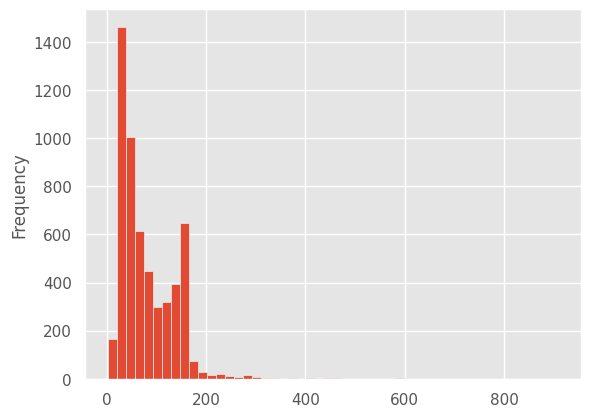

In [ ]:
message['length'].plot(bins=50,kind='hist')

In [ ]:
message.length.describe()

count    5572.000000
mean       80.105528
std        59.681416
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
message[message['length']==120]['message'].iloc[0]

'SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV'

## <b> Text Pre-processing </b>

### Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


### In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

### As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

### Let's create a function that will process the string in the message column, then we can just use <code>apply()</code> in pandas do process all the text in the DataFrame.

### First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Let us write a function which removes punctuation and stopwords from our data

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [ ]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-22-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
message['tokenized_message'] = message['message'].apply(text_process)

In [ ]:
message.head()

,label,message,length,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,Nah dont think goes usf lives around though


## <b> Vectorization </b>

### Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

### Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

### We'll do that in three steps using the bag-of-words model:

  1. ###  Count how many times does a word occur in each message (Known as term frequency)

  2. ### Weigh the counts, so that frequent tokens get lower weight

  3. ### Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

### Let's begin the first step:

### Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

### We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

### For example:

<table border = “1“>
<tr>
<th></th> <th>Word 1 Count</th> <th>Word 2 Count</th> <th>...</th> <th>Word N Count</th>
</tr>
<tr>
<td><b>Message 1</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Message 2</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Message N</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


### Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

### Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [ ]:
#del vectorizer

In [ ]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(message['tokenized_message'])

In [ ]:
X.toarray()[4560:4562]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(vectorizer.get_feature_names_out())

['0800' '08000839402' '08000930705' '10' '100' '1000' '10p' '12' '12hrs'
 '150' '150p' '150pm' '150pmsg' '150ppm' '16' '18' '1st' '200' '2000'
 '2003' '250' '2nd' '300' '350' '500' '5000' '750' '800' '8007' '86688'
 '87066' 'abiola' 'able' 'abt' 'account' 'across' 'actually' 'address'
 'admirer' 'aft' 'afternoon' 'age' 'ago' 'ah' 'aight' 'almost' 'alone'
 'already' 'alright' 'also' 'always' 'amp' 'angry' 'another' 'ans'
 'answer' 'anyone' 'anything' 'anytime' 'anyway' 'apply' 'ard' 'area'
 'around' 'asap' 'ask' 'askd' 'asked' 'asking' 'ass' 'attempt' 'auction'
 'available' 'await' 'award' 'awarded' 'away' 'awesome' 'b4' 'babe' 'baby'
 'back' 'bad' 'bank' 'bath' 'bathe' 'bcoz' 'bday' 'beautiful' 'bed'
 'believe' 'best' 'better' 'big' 'birthday' 'bit' 'bonus' 'book' 'booked'
 'bored' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring' 'brother' 'bslvyl'
 'bt' 'bus' 'busy' 'buy' 'call' 'called' 'caller' 'calling' 'calls'
 'camcorder' 'came' 'camera' 'cant' 'car' 'card' 'care' 'carlos' 'case'
 'ca

In [ ]:
len(vectorizer.get_feature_names_out())

872

In [ ]:
X.toarray().shape

(5572, 872)

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
message.iloc[4065]['tokenized_message']

'Fyi Im gonna call sporadically starting like ltgt bc doin shit'

In [ ]:
sum(X.toarray()[4065])

7

In [ ]:
X.toarray()[4065]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
sum(X.toarray()[4560])

10

In [ ]:
print(vectorizer.get_feature_names_out()[850])
print(vectorizer.get_feature_names_out()[840])

wow
wont


## <b>Training a model</b>

### Firstly we will do the usual train test split

In [ ]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['tokenized_message'],message['label'],test_size=0.2)

In [ ]:
msg_train.head()

3015    ltgt fast approaching Wish u Happy New Year Happy Sankranti Happy republic day Happy Valentines Day Happy Shivratri Happy Ugadi Happy Fools day Happy May Day Happy Independence Day Happy FriendshipMotherFatherTeachersChildrens Day amp HAPPY BIRTHDAY 4 U Happy Ganesh festival Happy Dasara Happy Diwali Happy Christmas ltgt Good Mornings Afternoons Evenings Nights RememberI first WISHING U THESEyours Raj
2090    Skallis wont play first two odi                                                                                                                                                                                                                                                                                                                                                                                     
4535    Never blame day ur life Good days give u happiness Bad days give u experience essential life Gods blessings good morning                                              

### With messages represented as vectors, we can finally train our spam/ham classifier. Now we can use Naive Bayes Classifier to perform this classification task

In [ ]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [ ]:
train_vectorized

<4457x872 sparse matrix of type '<class 'numpy.int64'>'
	with 24539 stored elements in Compressed Sparse Row format>

In [ ]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [ ]:
print(train_array[7])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(train_array,label_train)

In [ ]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Confusion matrices for train and test

print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[2941  933]
 [   0  583]]
[[719 232]
 [  7 157]]


In [ ]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

         ham       1.00      0.76      0.86      3874
        spam       0.38      1.00      0.56       583

    accuracy                           0.79      4457
   macro avg       0.69      0.88      0.71      4457
weighted avg       0.92      0.79      0.82      4457



              precision    recall  f1-score   support

         ham       0.99      0.76      0.86       951
        spam       0.40      0.96      0.57       164

    accuracy                           0.79      1115
   macro avg       0.70      0.86      0.71      1115
weighted avg       0.90      0.79      0.81      1115

